In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('filtered_data_vtv24.csv')

In [37]:
df.describe()

,Unnamed: 0,likes,views
count,4169.000000,4169.000000,4.169000e+03
mean,11755.202207,742.798033,1.104063e+05
std,6650.148674,4433.699331,3.675971e+05
min,8.000000,0.000000,0.000000e+00
25%,6084.000000,107.000000,1.195500e+04
50%,11838.000000,265.000000,3.623700e+04
75%,17569.000000,563.000000,1.027520e+05
max,23048.000000,238667.000000,1.251315e+07


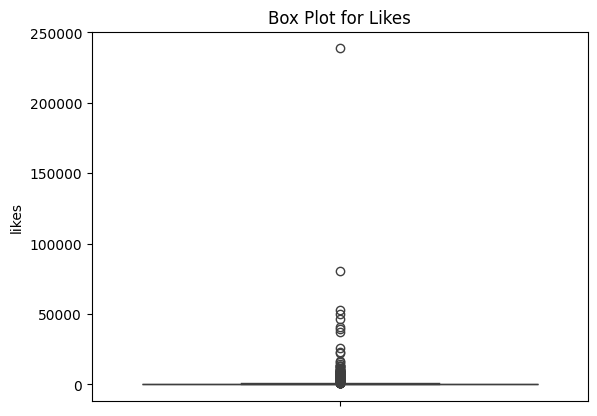

In [38]:
sns.boxplot(y='likes', data=df)
plt.title('Box Plot for Likes')
plt.show()

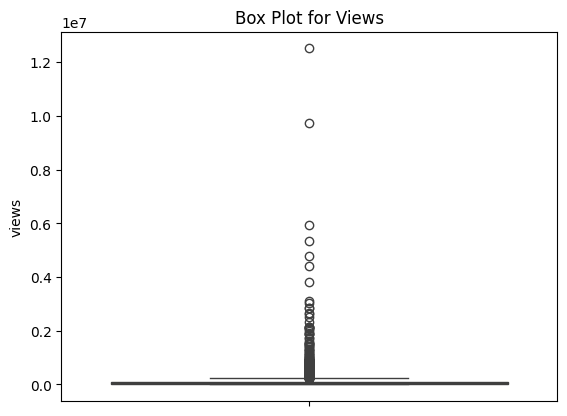

In [39]:
sns.boxplot(y='views', data=df)
plt.title('Box Plot for Views')
plt.show()

In [40]:
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_views = df[(df['views'] < lower_bound) | (df['views'] > upper_bound)]

In [41]:
Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_likes = df[(df['likes'] < lower_bound) | (df['likes'] > upper_bound)]

In [44]:
df_cleaned = df.drop(outliers_likes.index)
try:
    df_cleaned = df.drop(outliers_views.index)
except KeyError: print(f'Skipping {outliers_views.index}')
df_cleaned

,Unnamed: 0,video_id,published_date,video_title,video_description,likes,views
0,8,nRa-3AEpKWg,2024-06-02 13:59:11+00:00,Thời sự toàn cảnh tối 2/6: Thu phí ô tô vào nộ...,Thời sự toàn cảnh tối 2/6 có các nội dung:\n00...,312,88227
1,10,-GPRnfIb1pc,2023-10-13 04:00:00+00:00,"Làm sao để vấn nạn lạm thu học phí không ""đến ...","Mới chỉ bắt đầu năm học mới khoảng 1 tháng, nh...",250,31420
2,11,r05t9chGLHU,2024-08-24 13:30:22+00:00,Đa dạng các hoạt động “Những ngày Hà Nội tại T...,"Tại Phố đi bộ Nguyễn Huệ (Quận 1, TP.HCM), UBN...",62,6167
3,15,j276US6vqJk,2023-11-22 02:49:21+00:00,Thế giới toàn cảnh 22/11: Thế giới trước nguy ...,Những nội dung chính sẽ có trong Thế giới toàn...,168,25083
4,19,_ktCEZEI9aY,2023-12-29 01:00:19+00:00,Để thu phí sử dụng vỉa hè hiệu quả: Cần công k...,"Theo các chuyên gia, muốn chủ trương thu phí s...",77,9020
...,...,...,...,...,...,...,...
4163,23011,R-xzjWnuxqU,2024-10-07 04:00:20+00:00,Một ngày của trà nương: Những người truyền cảm...,"Với trà nương Lê Ngọc Linh, công việc pha trà ...",51,4242
4165,23025,IsvzvV7ev60,2024-04-03 16:00:16+00:00,Mã độc tống tiền gây thiệt hại nặng nề | VTV24,Mã độc tống tiền được đánh giá là một trong nh...,148,15341
4166,23038,syFXswGvrAo,2024-09-03 09:45:02+00:00,"Những thầy cô giáo vượt ngàn chông gai, quyết ...",Các thầy cô là một lát cắt trong hàng nghìn cu...,71,5656
4167,23046,bPqv8wf_x8Y,2023-09-26 04:00:28+00:00,Ấm áp lớp học tình thương của anh bảo vệ dân p...,"Suốt 13 năm qua, đều đặn từ 18h đến 20h30 thứ ...",118,6345


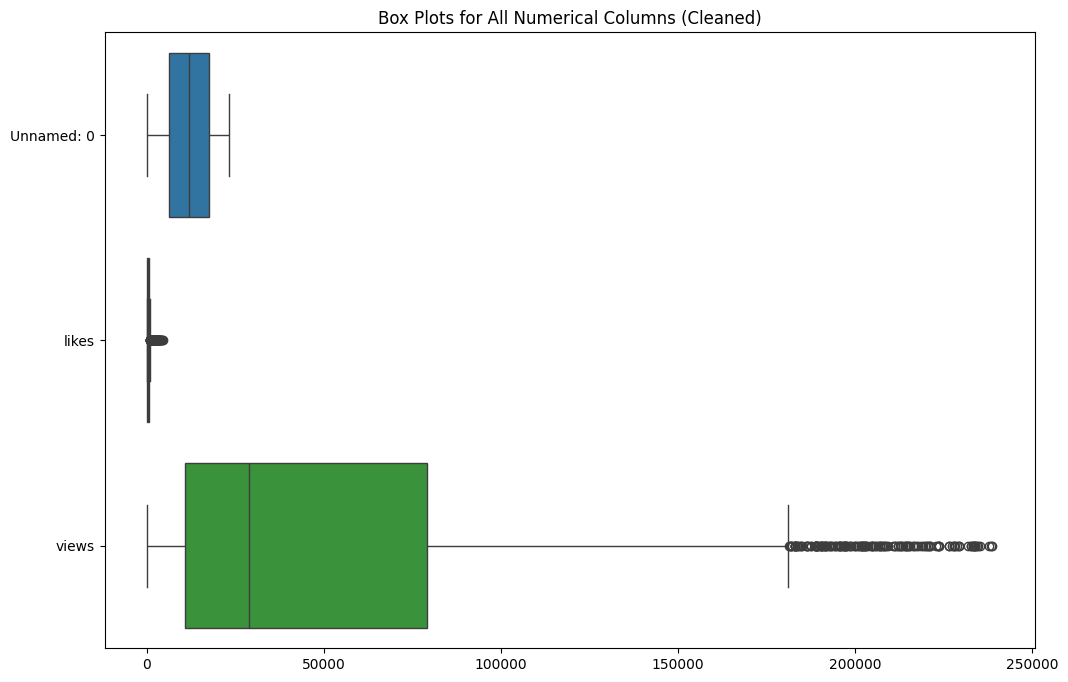

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, orient='h')
plt.title('Box Plots for All Numerical Columns (Cleaned)')
plt.show()